In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from decimal import Decimal

matplotlib.rcParams['figure.figsize'] = [15, 15]
matplotlib.rcParams.update({'font.size': 32})

fitness_difference_csv = pd.read_csv('./output/fitness_difference.csv')
print(fitness_difference_csv)
# print the row where fitness_difference is maximum

print(fitness_difference_csv.loc[fitness_difference_csv['fitness_difference'].idxmax()])

# sort the dataframe by b and lmax

fitness_difference_csv = fitness_difference_csv.sort_values(by=['b', 'lmax'])

              b      lmax  fitness_difference
0       0.00001  0.000000        9.412247e-10
1       0.00001  0.000401        9.412279e-10
2       0.00001  0.000802        9.412312e-10
3       0.00001  0.001202        9.412344e-10
4       0.00001  0.001603        9.412376e-10
...         ...       ...                 ...
249995  0.14000  0.198397        4.151514e-03
249996  0.14000  0.198798        4.151358e-03
249997  0.14000  0.199198        4.151204e-03
249998  0.14000  0.199599        4.151050e-03
249999  0.14000  0.200000        4.150898e-03

[250000 rows x 3 columns]
b                     0.140000
lmax                  0.191182
fitness_difference    0.004154
Name: 249977, dtype: float64


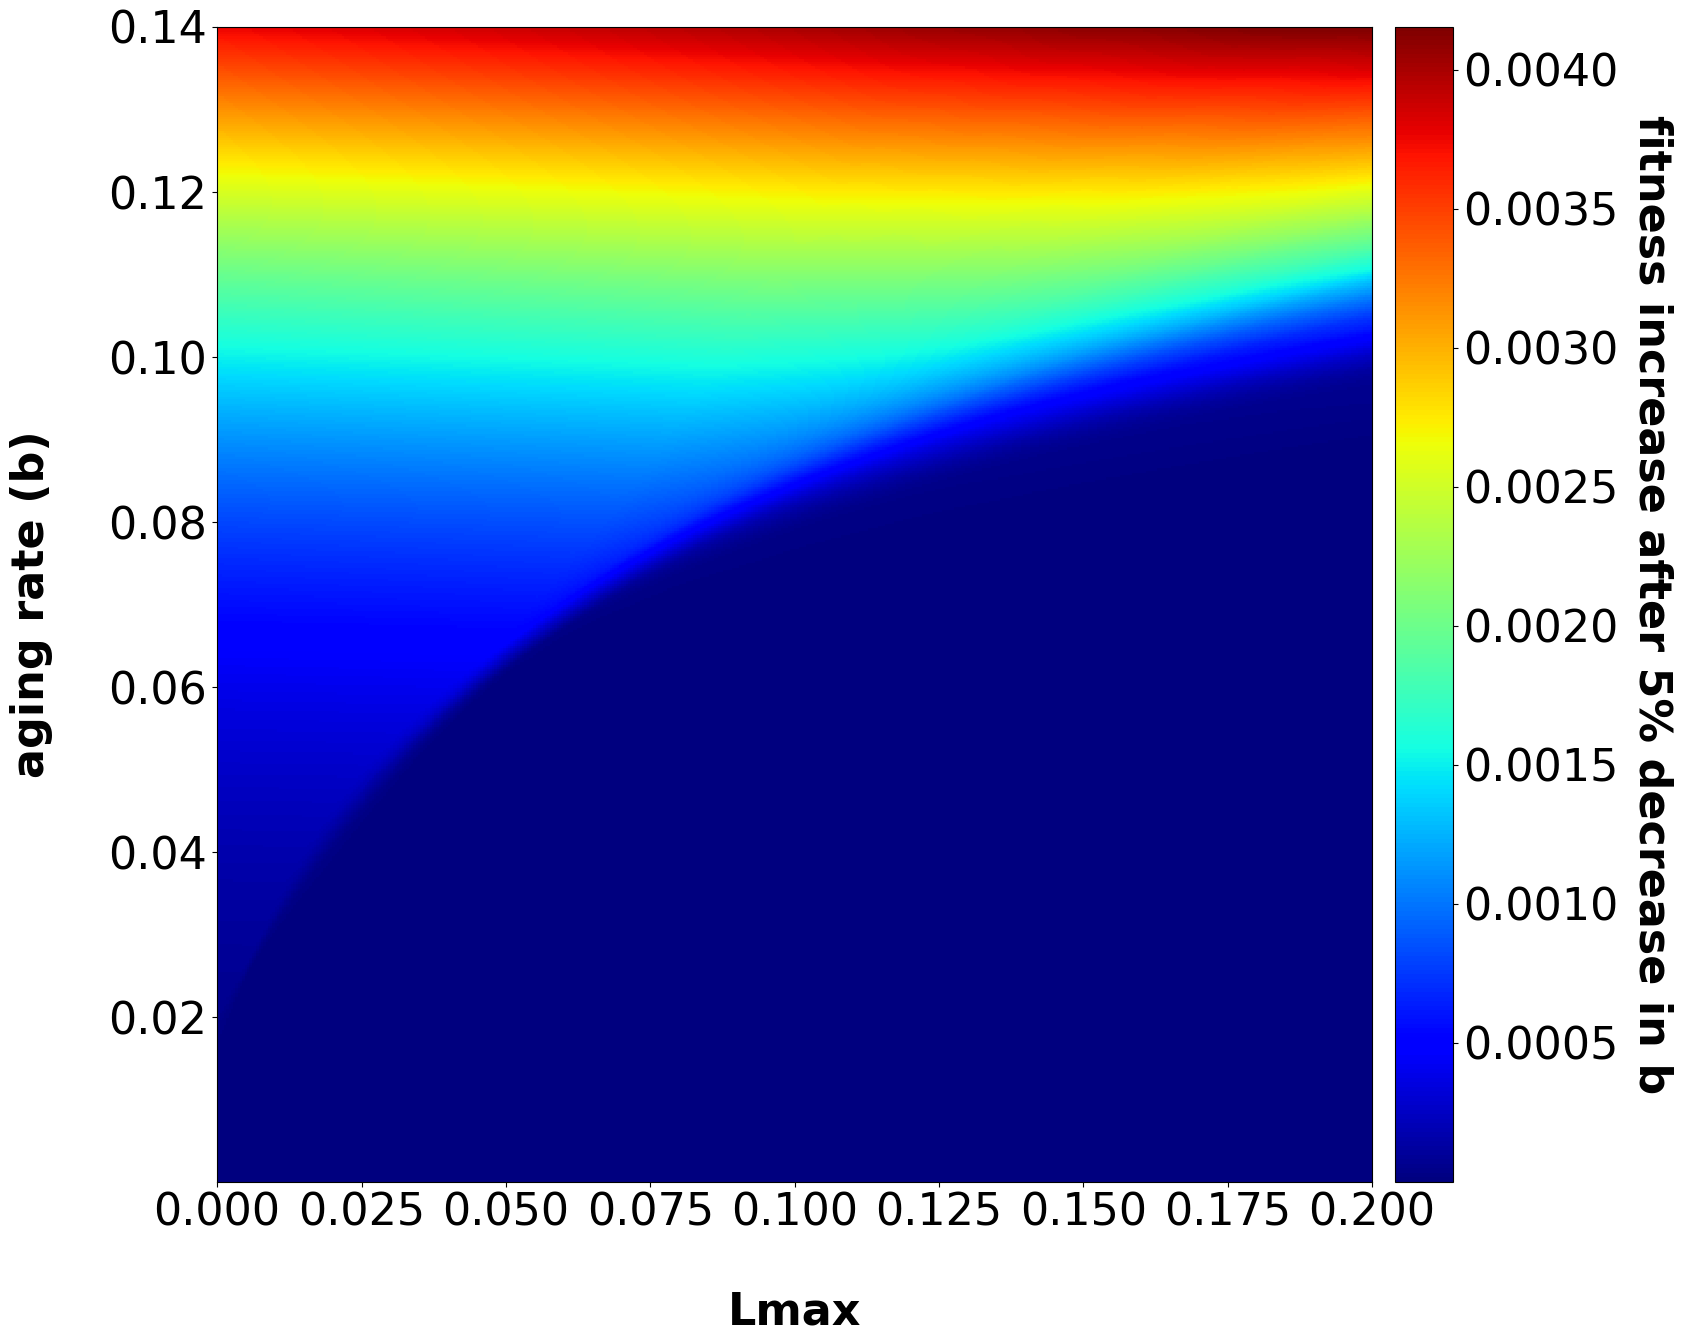

In [23]:
b = fitness_difference_csv['b']
lmax = fitness_difference_csv['lmax']
fitness_difference = fitness_difference_csv['fitness_difference']

grid_size = int(np.sqrt(len(b)))

b = np.array(b).reshape(grid_size, grid_size)
lmax = np.array(lmax).reshape(grid_size, grid_size)
fitness_difference = np.array(fitness_difference).reshape(grid_size, grid_size)

fig = plt.figure()
ax = plt.axes()
extent = [lmax.min(), lmax.max(), b.min(), b.max()]
im = ax.imshow(fitness_difference, cmap="jet", interpolation="none", origin="lower", extent=extent, aspect = abs((extent[1]-extent[0])/(extent[3]-extent[2])))
axins = inset_axes(ax, width = "5%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)
cbar = fig.colorbar(im, cax = axins)
# cbar.ax.tick_params(labelsize=25)
cbar.set_label('fitness increase after 5% decrease in b', rotation=270, labelpad = 40, fontweight="bold")


ax.set_ylabel("aging rate (b)", fontweight="bold", labelpad=40)
ax.set_xlabel("Lmax", fontweight="bold", labelpad=40)
# ax.set_title("Selection Pressure", fontweight="bold", fontsize=35, pad=40)

ax.tick_params(axis="x") 
ax.tick_params(axis="y") 
plt.savefig("./output/selection_pressure.png", bbox_inches='tight')
plt.show()


In [3]:
# Compute the difference to the first value in a line
diff = np.zeros_like(fitness_difference)
for i, row in enumerate(fitness_difference):
    r = [(x-row[0]) for x in row]
    diff[i, :] = r

# Save max and min differences
max_diff = np.max(diff)
min_diff = np.min(diff)

# Normalize the differences (this makes the plot way prettier)
for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        y = diff[i, j]
        if y > 0:
            diff[i, j] = y/max_diff
        if y < 0:
            diff[i, j] = -(y/min_diff)

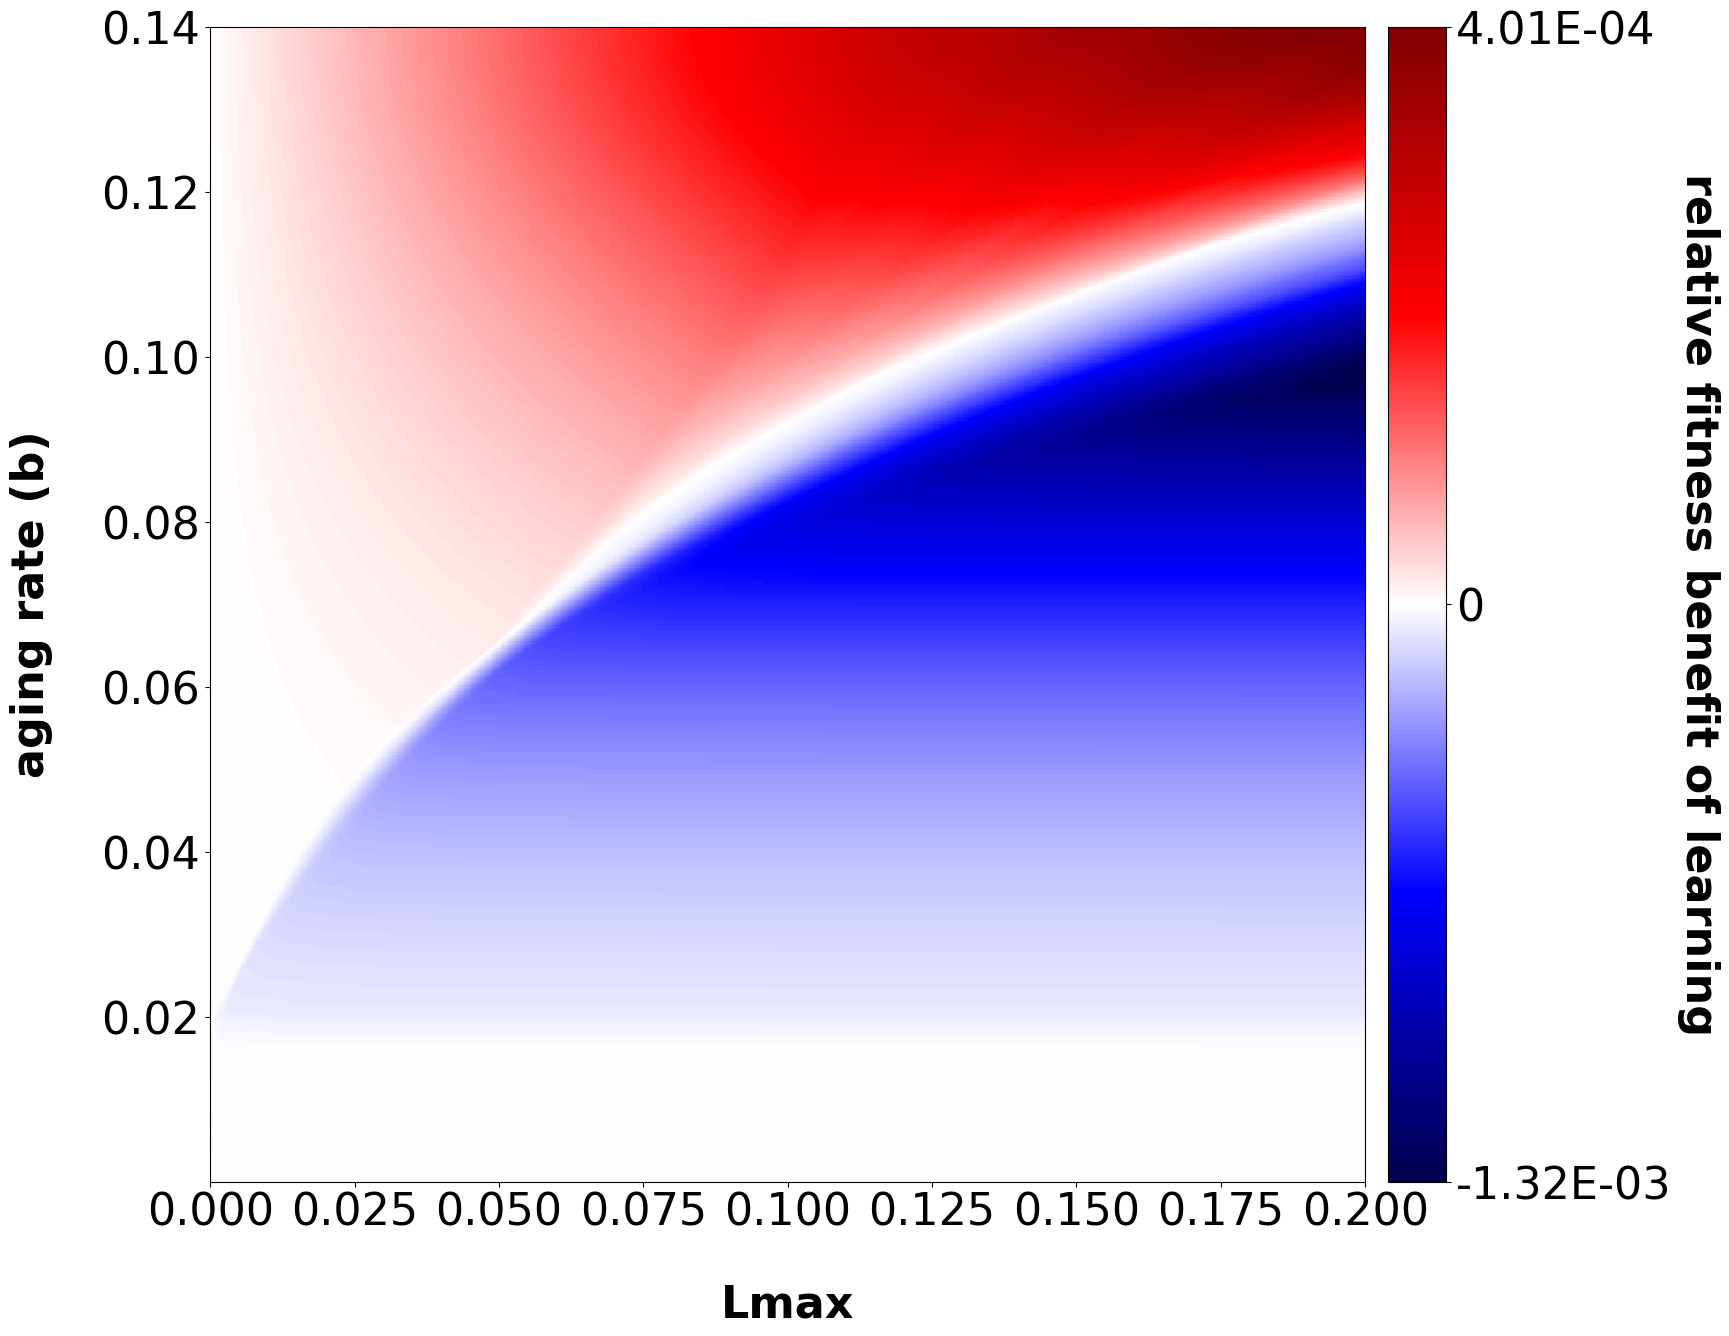

In [24]:
fig = plt.figure()
ax = plt.axes()

im = ax.imshow(diff, cmap="seismic", interpolation="none", origin="lower", extent=extent, aspect = abs((extent[1]-extent[0])/(extent[3]-extent[2])))

axins = inset_axes(ax, width = "5%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)

cbar = fig.colorbar(im, cax = axins, ticks = [-1, 0, 1])
cbar.ax.set_yticklabels(['%.2E' % Decimal(min_diff), '0', '%.2E' % Decimal(max_diff)])
cbar.set_label('relative fitness benefit of learning', rotation=270, labelpad = 35, fontweight="bold")


ax.set_ylabel("aging rate (b)", fontweight="bold", labelpad=35)
ax.set_xlabel("Lmax", fontweight="bold", labelpad=35)

plt.savefig("./output/fitness_benefit_of_learning.png", bbox_inches='tight')
# ax.scatter(0, final_value_without_learning, marker = 'x', linewidths=20)
# ax.scatter(0.1, final_value_with_learning, marker = "x", linewidths=20)


plt.show()

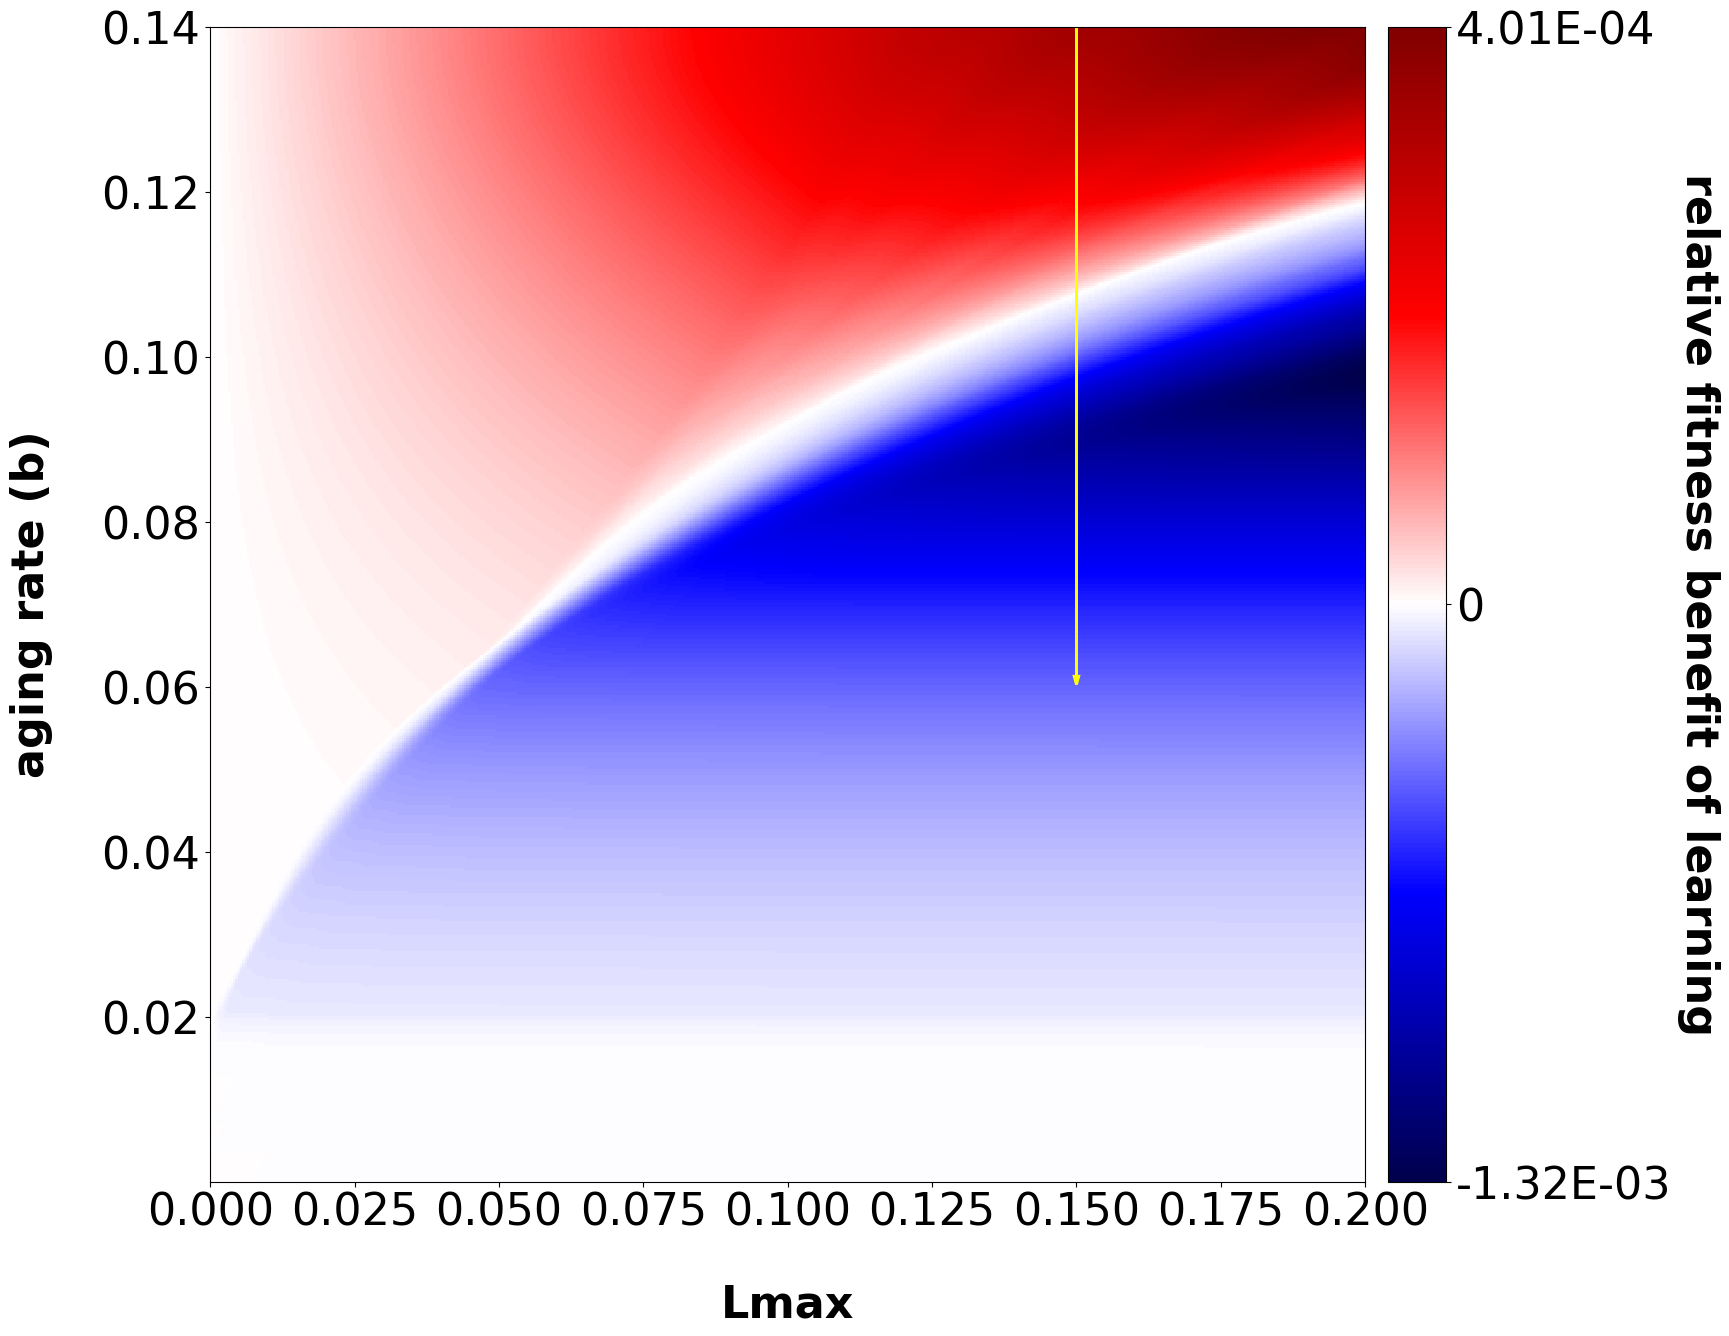

In [20]:
# Plot the evolution trajectory on top
simulation_learning_df = pd.read_csv('/home/spsalmon/agent_based_simulation/simulation_results/plateau_brass_polynomial_equal_both_random_mating_with_learning_non_reproducing_removed_0.15.csv')
average_learning = simulation_learning_df.groupby('time')[['mean_b', 'mean_lmax']].mean().reset_index()

# simulation_no_learning_df = pd.read_csv('/home/spsalmon/agent_based_simulation/simulation_results/plateau_brass_polynomial_equal_both_random_mating_without_learning_non_reproducing_removed_0.15.csv')
# average_no_learning = simulation_no_learning_df.groupby('time')[['mean_b', 'mean_lmax']].mean().reset_index()

fig = plt.figure()
ax = plt.axes()

im = ax.imshow(diff, cmap="seismic", interpolation="none", origin="lower", extent=extent, aspect = abs((extent[1]-extent[0])/(extent[3]-extent[2])))
# ax.plot(average_learning['mean_lmax'], average_learning['mean_b'], linewidth=2, color="yellow")
ax.arrow(average_learning['mean_lmax'].iloc[0], average_learning['mean_b'].iloc[0], average_learning['mean_lmax'].iloc[-1]-average_learning['mean_lmax'].iloc[0], average_learning['mean_b'].iloc[-1]-average_learning['mean_b'].iloc[0], head_width=0.0008, head_length=0.001, color="yellow", linewidth=2, width=0.000002)

axins = inset_axes(ax, width = "5%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)

cbar = fig.colorbar(im, cax = axins, ticks = [-1, 0, 1])
cbar.ax.set_yticklabels(['%.2E' % Decimal(min_diff), '0', '%.2E' % Decimal(max_diff)])
cbar.set_label('relative fitness benefit of learning', rotation=270, labelpad = 35, fontweight="bold")


ax.set_ylabel("aging rate (b)", fontweight="bold", labelpad=35)
ax.set_xlabel("Lmax", fontweight="bold", labelpad=35)

plt.show()
